In [1]:
# import
%matplotlib inline  
import matplotlib.pyplot as plt

import collections
import math
import random
import math
import numpy as np

In [2]:
# create traders class
class RandomTrader:
    def __init__(self, stock, cash):
        self.X = stock.copy()
        self.cash = cash.copy()
    
    def random_trade(self, S, current_step):
        buyOrSell = np.random.randint(0, 2)
        if buyOrSell == 0:
            return self.buy(S, current_step)
        elif buyOrSell == 1:
            return self.sell(S, current_step)
    
    def buy(self, S, current_step):
        if self.cash[current_step - 1] >= S[current_step - 1] * 2:
            return np.random.randint(-2, 1)
        else:
            return 0
    
    def sell(self, S, current_step):
        if self.X[current_step - 1] >= 2:
            return np.random.randint(0, 3)
        else:
            return 0

    def trade(self, S, current_step):
        trade = self.random_trade(S, current_step)
        self.X[current_step] = self.X[current_step - 1] + trade
        self.cash[current_step] = self.cash[current_step - 1] - trade * S[current_step - 1]
            
    def get_stock(self):
        return self.X
    
    def get_value(self, S):
        return [x * s + c for x, s, c in zip(self.X, S, self.cash)]
    
class TrendFollower:
    def __init__(self, stock, cash):
        self.X = stock.copy()
        self.cash = cash.copy()
        self.min_leverage = 1
        self.max_leverage = 8
        self.action = np.zeros(np.shape(X))
        self.actions = np.zeros(np.shape(X))
    
    def trend_following_trade(self, S, current_step):
        if current_step <= 3:
            return 0
        mean = sum(S[current_step - 4:current_step - 1])/3
        if S[current_step - 1] < mean:
            self.actions[current_step] = self.sell(S, current_step)
            return self.sell(S, current_step)
        elif S[current_step - 1] > mean:
            self.actions[current_step] = self.buy(S, current_step)
            return self.buy(S, current_step)
        else:
            return 0
        
    def buy(self, S, current_step):
        self.action[current_step] = 1
        totalValue = X[current_step - 1] * S[current_step - 1] + cash[current_step - 1]
        return np.floor((self.max_leverage / (self.max_leverage + 1)) * totalValue / S[current_step - 1]) - self.X[current_step - 1]
    
    def sell(self, S, current_step):
        self.action[current_step] = -1
        totalValue = X[current_step - 1] * S[current_step - 1] + cash[current_step - 1]
        return np.ceil((self.min_leverage / (self.min_leverage + 1)) * totalValue / S[current_step - 1]) - self.X[current_step - 1]

    def trade(self, S, current_step):
        trade = self.trend_following_trade(S, current_step)
        self.X[current_step] = self.X[current_step - 1] + trade
        self.cash[current_step] = self.cash[current_step - 1] - trade * S[current_step - 1]
            
    def get_stock(self):
        return self.X
    
    def get_cash(self):
        return self.cash
    
    def get_value(self, S):
        return [x * s + c for x, s, c in zip(self.X, S, self.cash)]
    
class MeanReversion:
    def __init__(self, stock, cash):
        self.X = stock.copy()
        self.cash = cash.copy()
        self.min_leverage = 1
        self.max_leverage = 8
        self.action = np.zeros(np.shape(X))
        self.actions = np.zeros(np.shape(X))
        
    def mean_reversion_trade(self, S, current_step):
        if current_step <= 3:
            return 0
        mean = sum(S[current_step - 4:current_step - 1])/3
        if S[current_step - 1] > mean:
            self.actions[current_step] = self.sell(S, current_step)
            return self.sell(S, current_step)
        elif S[current_step - 1] < mean:
            self.actions[current_step] = self.buy(S, current_step)
            return self.buy(S, current_step)
        else:
            return 0
        
    def buy(self, S, current_step):
        self.action[current_step] = 1
        totalValue = X[current_step - 1] * S[current_step - 1] + cash[current_step - 1]
        return np.floor((self.max_leverage / (self.max_leverage + 1)) * totalValue / S[current_step - 1]) - self.X[current_step - 1]
    
    def sell(self, S, current_step):
        self.action[current_step] = -1
        totalValue = X[current_step - 1] * S[current_step - 1] + cash[current_step - 1]
        return np.ceil((self.min_leverage / (self.min_leverage + 1)) * totalValue / S[current_step - 1]) - self.X[current_step - 1]
    
    def trade(self, S, current_step):
        trade = self.mean_reversion_trade(S, current_step)
        self.X[current_step] = self.X[current_step - 1] + trade
        self.cash[current_step] = self.cash[current_step - 1] - trade * S[current_step - 1]
            
    def get_stock(self):
        return self.X
    
    def get_cash(self):
        return self.cash
    
    def get_value(self, S):
        return [x * s + c for x, s, c in zip(self.X, S, self.cash)]

In [3]:
class QTrader:
    def __init__(self, stock, cash):
        self.X = stock.copy()
        self.cash = cash.copy()
        self.min_leverage = 2
        self.max_leverage = 8
        self.num_actions = 3
        self.epsilon = 1
        self.gamma = 0.95
        self.learning_rate = 0.8
        self.table = collections.defaultdict(float)
     
    def reset_table(self):
        self.table = collections.defaultdict(float)
        self.epsilon = 1
        
    def reset_trader(self, stock, cash):
        self.X = stock.copy()
        self.cash = cash.copy()
    
    def select_eps_greedy_action(self, obs):
        _, action = self.best_action_value(obs)
        if random.random() < epsilon:
            return random.randint(0, self.num_actions - 1)
        else:
            return action
    
    def select_greedy_action(self, obs):
        _, action = self.best_action_value(obs)
        return action        
    
    def best_action_value(self, state):
        best_action = 0
        max_value = 0
        for action in range(self.num_actions):
            if self.table[(state, action)] > max_value:
                best_action = action
                max_value = self.table[(state, action)]
        return max_value, best_action
    
    def q_learning(self, prev_obs, next_obs, reward, action):
        best_value, _ = self.best_action_value(next_obs)
        q_target = reward + self.gamma * best_value
        q_error = q_target - self.table[(prev_obs, action)]
        self.table[(prev_obs, action)] += self.learning_rate * q_error
        
    def update_epsilon(self, decay_rate):
        self.epsilon *= decay_rate
        
    def action_based_trade(self, S, current_step, action):
        if action == 0:
            return 0
        elif action == 1:
            return np.random.randint(-2, 0)
        elif action == 2:
            return np.random.randint(1, 3)
    
    def trade(self, S, current_step, action):
        trade = self.action_based_trade(S, current_step, action)
        self.X[current_step] = self.X[current_step - 1] + trade
        self.cash[current_step] = self.cash[current_step - 1] - trade * S[current_step - 1]
        
    def get_reward(self, S, current_step):
        return (self.X[current_step] * S[current_step] + self.cash[current_step]) - (self.X[current_step - 1] * S[current_step - 1] + self.cash[current_step - 1])
        
    def get_stock(self):
        return self.X
    
    def get_cash(self):
        return self.cash
    
    def get_value(self, S):
        return [x * s + c for x, s, c in zip(self.X, S, self.cash)]

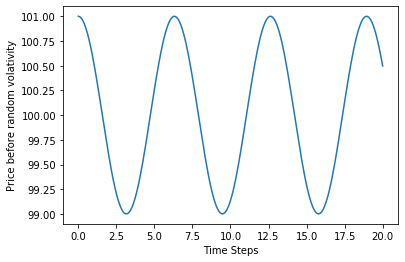

In [4]:
# initialize global variables
T = 20
dt = 0.1
N = round(T/dt)
t = np.linspace(0, T, N)
X0 = 50
cash0 = 1000
S0 = 100

# initialize securities number and price for each step
X = [X0] * N
cash = [cash0] * N
S_init = [S0] * N
S_init = S0 + np.cos(np.arange(0, T, dt))

plt.plot(t, S_init)
plt.xlabel('Time Steps')
plt.ylabel('Price before random volativity')
plt.show()

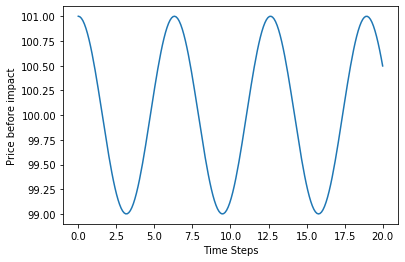

In [5]:
## independent random variable in volativity
xi = np.insert(np.random.normal(0, 1.0, N - 1), 0, 0.0)

## price dynamics
# volativity factors
def volativity_factor(volativity, xi):
    return volativity * xi

volativity = 0

S_original = [S_init[i] + volativity_factor(volativity, xi[i]) for i in range(N)]

plt.plot(t, S_original)
plt.xlabel('Time Steps')
plt.ylabel('Price before impact')
plt.show()

In [6]:
def discretise(num):
    return math.floor(num * 10) / 10

In [7]:
# impact
def permanent_impact(n, gamma):
    return gamma * n

def temporary_impact(n, epsilon, eta):
    return epsilon * np.sign(n) + eta * n

gamma = 0.01
epsilon = 0.1
eta = 0.1

In [8]:
class Environment:
    def __init__(self, qTrader):
        self.S = S_original.copy()
        self.n = np.zeros(np.shape(X))
        self.current_step = 0
        self.traders = []
        self.qTrader = qTrader
        
    def reset(self):
        self.qTrader.reset_trader(X, cash)
        self.S = S_original.copy()
        self.n = np.zeros(np.shape(X))
        self.current_step = 0
        return discretise(self.S[0])
    
    def step(self, action):
        for trader in self.traders:
            trader.trade(self.S, self.current_step)
            self.n[self.current_step] += trader.get_stock()[self.current_step - 1] - trader.get_stock()[self.current_step]
        self.qTrader.trade(self.S, self.current_step, action)
        self.n[self.current_step] += self.qTrader.get_stock()[self.current_step - 1] - self.qTrader.get_stock()[self.current_step]
        self.S[self.current_step] = self.S[self.current_step] - permanent_impact(self.n[self.current_step], gamma)
        self.current_step += 1
        return discretise(self.S[self.current_step - 1]), self.qTrader.get_reward(self.S, self.current_step - 1), self.current_step >= N
    
    def plot_price(self):
        plt.plot(t, self.S)
        plt.xlabel('Time Steps')
        plt.ylabel('Price after impact')
        plt.show()
        
    def plot_value(self):
        value = self.qTrader.get_value(self.S)
        plt.plot(t, value)
        plt.xlabel('Time Steps')
        plt.ylabel('Current portfolio')
        plt.show()

In [9]:
qt = QTrader(X, cash)
env = Environment(qt)

In [10]:
def test_game(trader, environment):
    reward_games = []
    for _ in range(100):
        obs = environment.reset()
        rewards = 0
        while True:
            next_obs, reward, done = environment.step(trader.select_greedy_action(obs))
            obs = next_obs
            rewards += reward
            
            if done:
                reward_games.append(rewards)
                break
    return np.mean(reward_games)

In [11]:
EPS_DECAY_RATE = 0.9993
MAX_GAMES = 15000

obs = env.reset()
games_count = 0
# reward_count = 0
test_reward_list = []

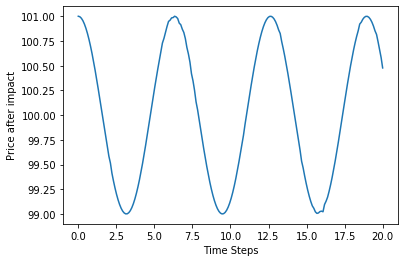

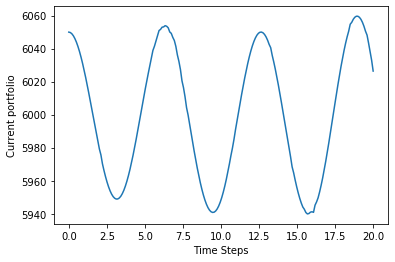

50  and  1000.0
Games:  0 Test reward:  58.91932395585334


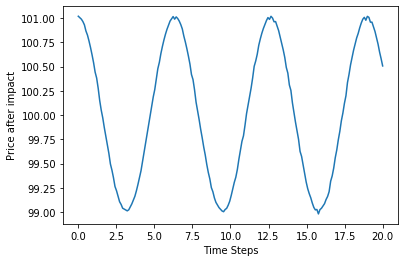

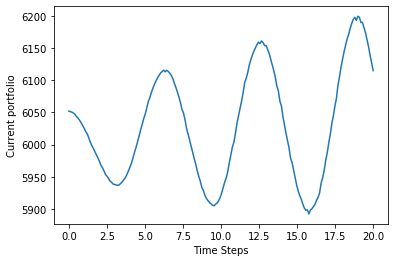

52  and  799.0056284102576
Games:  1000 Test reward:  69.55675393797895


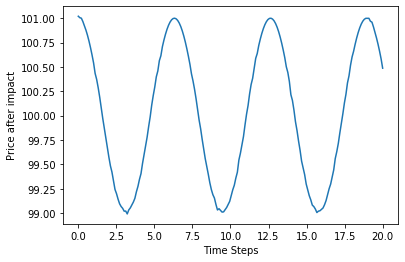

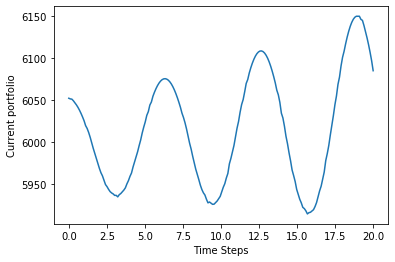

52  and  799.0056284102576
Games:  2000 Test reward:  85.01360123664342


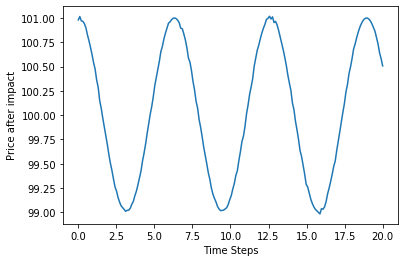

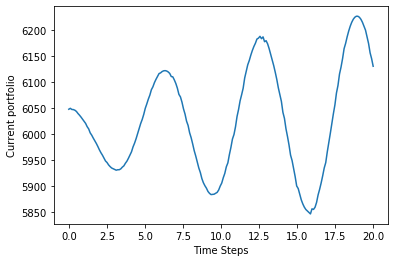

48  and  1200.9943715897425
Games:  3000 Test reward:  68.9930676355307


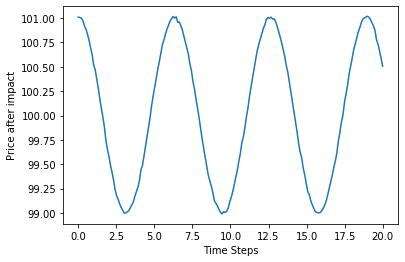

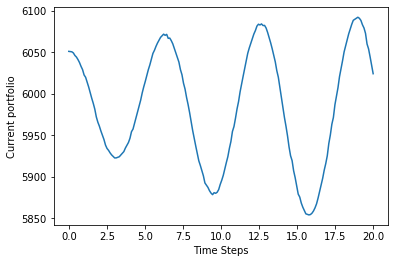

51  and  899.5028142051287
Games:  4000 Test reward:  50.90344249251782


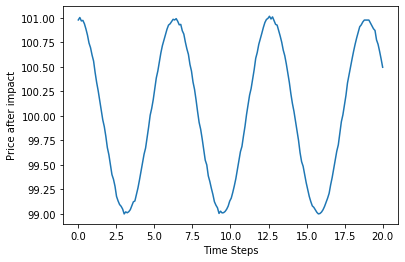

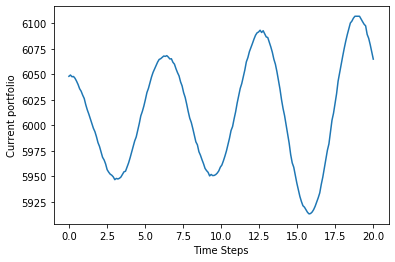

48  and  1200.9943715897425
Games:  5000 Test reward:  4.288979537778541


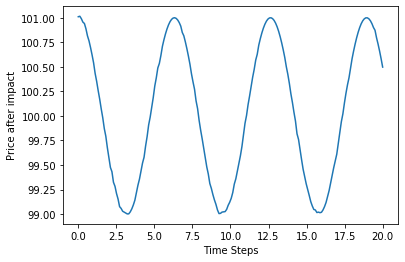

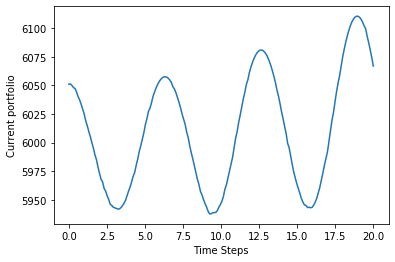

51  and  899.5028142051287
Games:  6000 Test reward:  62.93929953403312


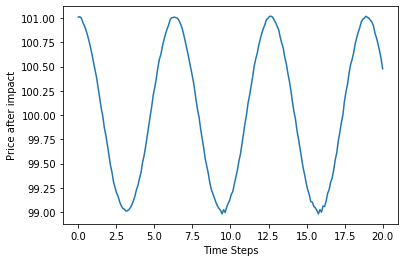

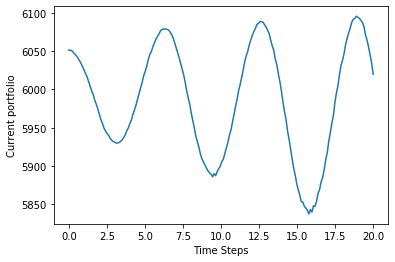

51  and  899.5028142051287
Games:  7000 Test reward:  -30.930748825044756


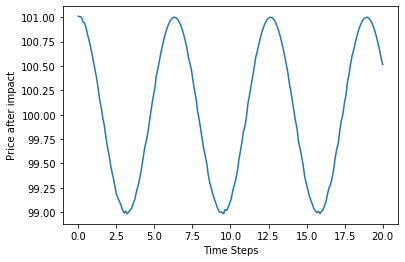

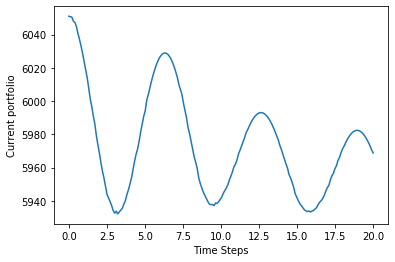

51  and  899.5028142051287
Games:  8000 Test reward:  -21.044934846274362


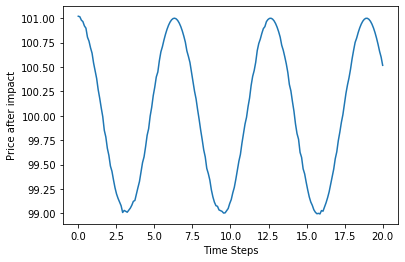

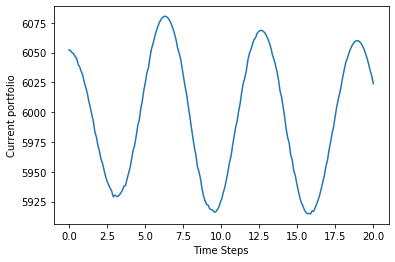

52  and  799.0056284102576
Games:  9000 Test reward:  -37.75022823008599


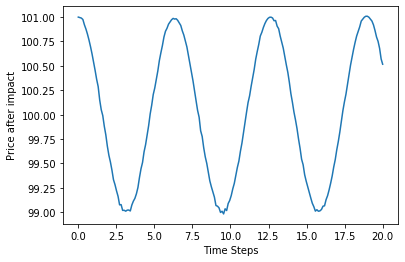

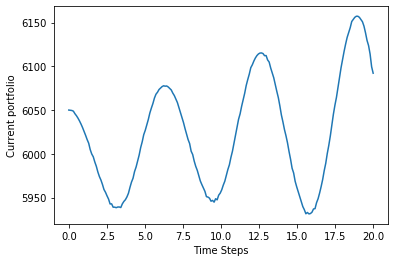

50  and  1000.0
Games:  10000 Test reward:  106.61843762322293


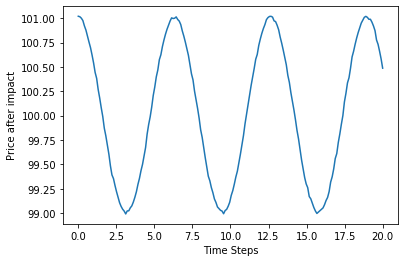

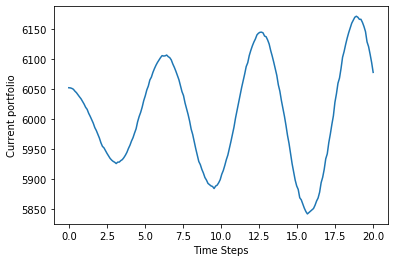

52  and  799.0056284102576
Games:  11000 Test reward:  24.074137653298166


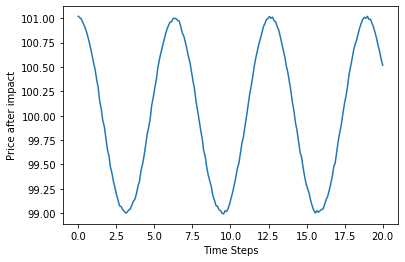

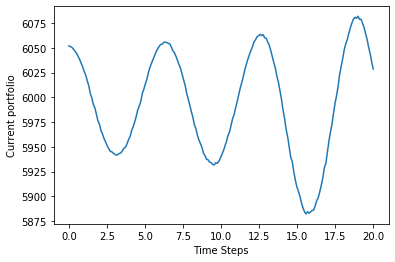

52  and  799.0056284102576
Games:  12000 Test reward:  65.13466977547836


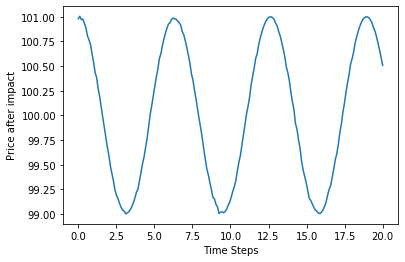

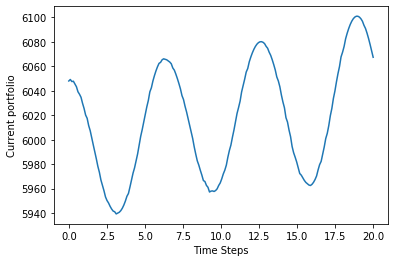

48  and  1200.9943715897425
Games:  13000 Test reward:  28.822056550417937


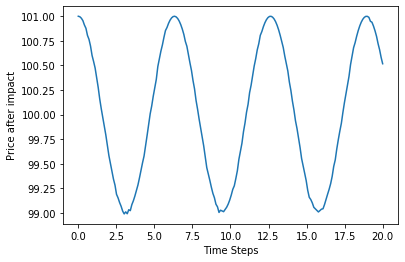

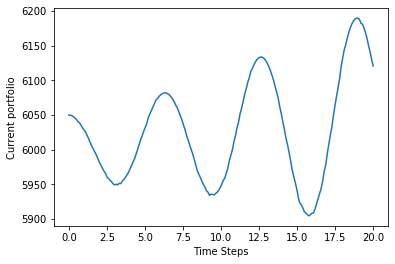

50  and  1000.0
Games:  14000 Test reward:  128.09448998962728


In [12]:
while games_count < MAX_GAMES:
    action = qt.select_eps_greedy_action(obs)
    next_obs, reward, done = env.step(action)
    qt.q_learning(obs, next_obs, reward, action)
    obs = next_obs
    if done:
        qt.update_epsilon(EPS_DECAY_RATE)
        if games_count % 1000 == 0:
            env.plot_price()
            env.plot_value()            
            print(qt.get_stock()[0], " and ", qt.get_cash()[0])
            test_reward = test_game(qt, env)
            print('Games: ', games_count, 'Test reward: ', test_reward)
            test_reward_list.append(test_reward)
        obs = env.reset()
        games_count += 1

In [13]:
qt.table

defaultdict(float,
            {(101.0, 0): 3.4182589814658546,
             (101.0, 1): 7.118002998280413,
             (101.0, 2): 4.114647942192002,
             (100.9, 0): 1.4688813852748825,
             (100.9, 1): 0.754005445315039,
             (100.9, 2): 2.192135647009681,
             (100.8, 0): 2.435926406585379,
             (100.8, 1): -2.4690552400634638,
             (100.8, 2): -0.010169591880519135,
             (100.7, 0): 0.4604485184410616,
             (100.7, 1): -1.0032993258404062,
             (100.7, 2): 0.42878704496627407,
             (100.6, 0): 2.5263735588138623,
             (100.6, 1): -2.166413799333873,
             (100.6, 2): -0.23960309592775886,
             (100.5, 0): 2.942978005828481,
             (100.5, 1): 1.4540774483075438,
             (100.5, 2): 5.2105213217706,
             (100.4, 0): 10.993234035618796,
             (100.4, 1): 8.744391947671751,
             (100.4, 2): 14.718681102357245,
             (100.3, 0): 21.4108757874

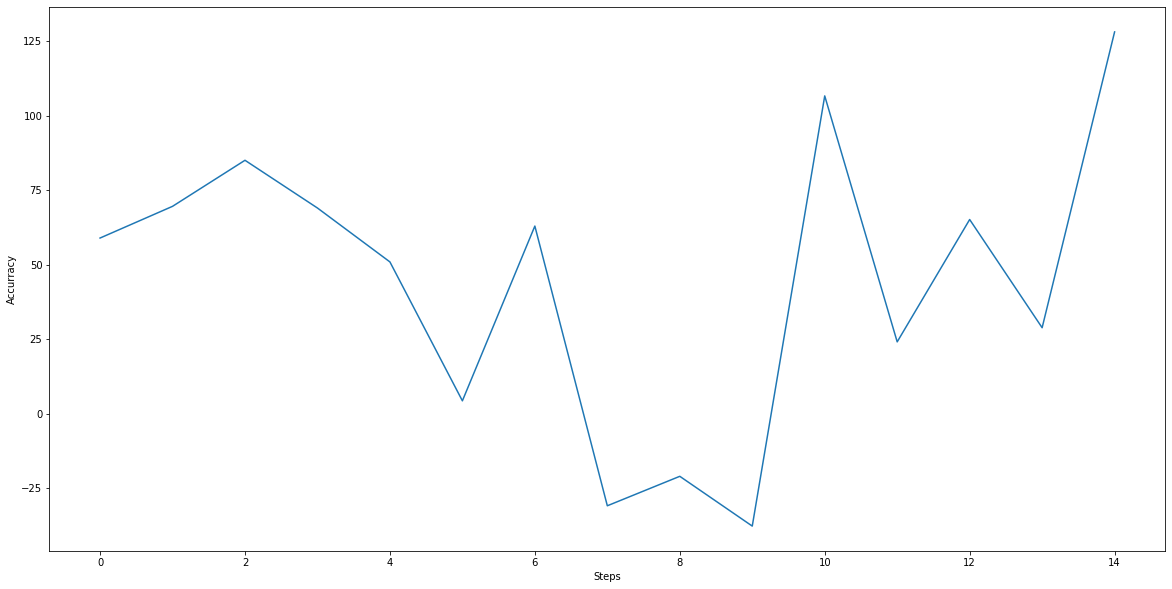

In [15]:
plt.figure(figsize=(20,10))
plt.xlabel('Steps')
plt.ylabel('Accurracy')
plt.plot(test_reward_list)
plt.show()